### Fig. 6   

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append('/home/caoyuyao/dataset_14T/UID-Moji/src')
from visualization import ObservationMap, ProbabilityMatrix
from utils import load_pressure_data, get_hour_list, load_pressure_data
from tqdm import tqdm
from quality_control import QualityControlTool
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

data_dir = '/mnt/cyy14/2019080910-2019081110_117.2-123.2_27.3-33.3_RF_MD9999_MSL1_N30_MS0.7_sea-level_stacked\
_data_low_elev_all_users_split/'
tc_stacked_data = np.load(data_dir+'2019080910-2019081110_corrected_observer_data_len100-999999_merged.npy')
tc_stacked_data[:, 3] += tc_stacked_data[:, -1]

qc_data=np.load('/mnt/cyy14/data_qg/new_QCed_smartphone_data_allhour.npy')
qced_data=np.load('/home/qiaoge/from_cyy/good_QCed_smartphone_data_allhour.npy')


In [ ]:

def draw_matrix(pm, s, truth, measure):
    cs=pm.plot_matrix(cbar_label = r'log$_{10}$ (Probability)', label_size = 15, ylabel = None,\
                      colorbar=False, xlabel=None)
    plt.plot([930, 1020], [930, 1020], 'k--')
    plt.xlim(930, 1020)
    plt.ylim(930, 1020)
    plt.clim(-7, -3)
    plt.text(0.04, 0.95, s = s, fontsize=15, transform=ax.transAxes, va='top', ha='left')
    plt.yticks(list(range(940,1021,20)), fontsize = 12)
    plt.xticks(list(range(940,1021,20)), fontsize = 12)
    mae = mean_absolute_error(truth, measure)
    rmse = mean_squared_error(truth, measure, squared = False)
    bias = np.nanmean((truth - measure))
    plt.text(0.45, 0.24, s = 'MAE = {:.3f} hPa'.format(mae), fontsize=15, transform=ax.transAxes)
    plt.text(0.45, 0.14, s = 'RMSE = {:.3f} hPa'.format(rmse), fontsize=15, transform=ax.transAxes)
    plt.text(0.45, 0.04, s = 'Bias = {:.3f} hPa'.format(bias), fontsize=15, transform=ax.transAxes)
    return cs

In [ ]:

pm = ProbabilityMatrix()
pm.get_probability_matrix(x = tc_stacked_data[:, 5], y  = tc_stacked_data[:, 3],\
                          x_range = [900, 1050],y_range = [900, 1050])

pm_2 = ProbabilityMatrix()
pm_2.get_probability_matrix(x = tc_stacked_data[:, 5], y  = tc_stacked_data[:, 3] - tc_stacked_data[:, -1],\
                            x_range = [900, 1050],y_range = [900, 1050])

pm_3 = ProbabilityMatrix()
pm_3.get_probability_matrix(x = qc_data[:, 5], y  = qc_data[:, 3],\
                            x_range = [900, 1050],y_range = [900, 1050])

pm_4 = ProbabilityMatrix()
pm_4.get_probability_matrix(x = qced_data[:, 3], y  = qced_data[:, 2],\
                            x_range = [900, 1050],y_range = [900, 1050])

100%|███████████████████████████████████████████████████████████████████████████████████████████| 8100571/8100571 [00:58<00:00, 139186.37it/s]


In [46]:
a=qced_data.shape[0]
b=qc_data.shape[0]
print((b-a)/b)

0.1377618876957608


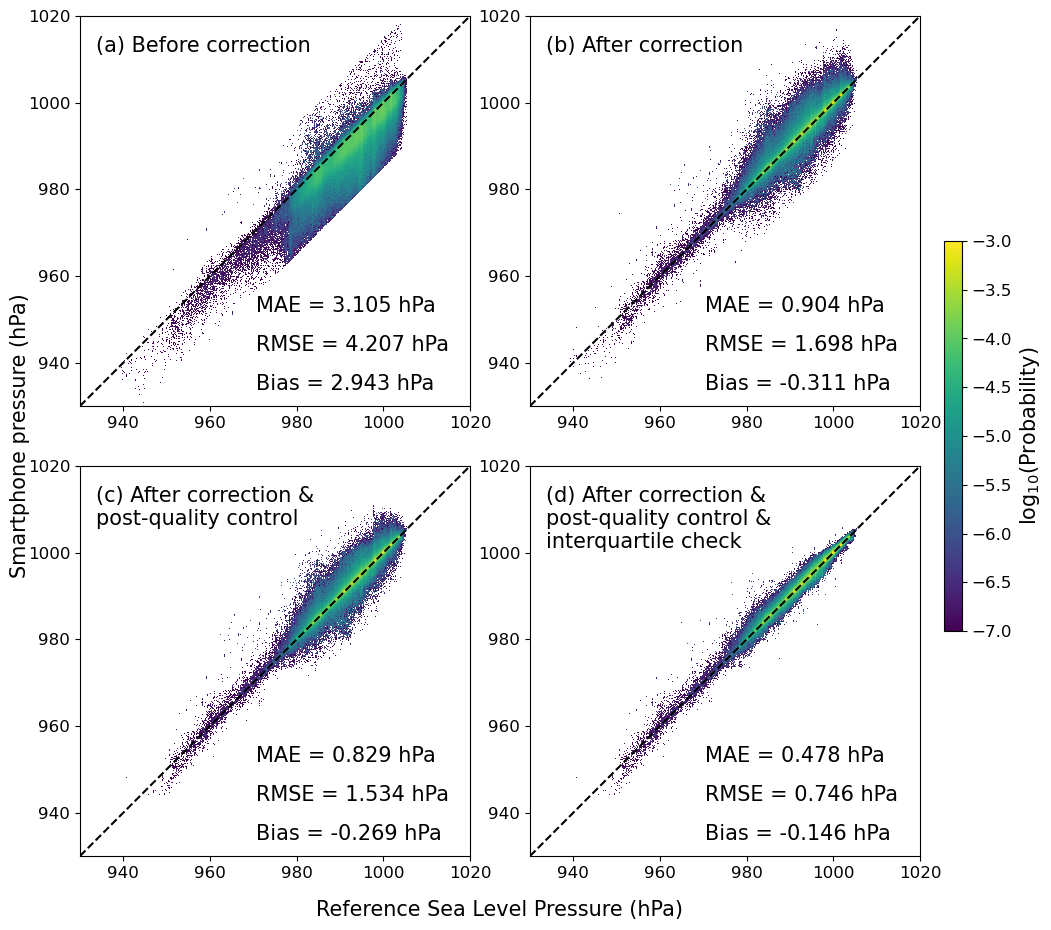

In [ ]:
valid_ind = (~np.isnan(tc_stacked_data[:, 5])) & (~np.isnan(tc_stacked_data[:, 3]))
valid_corrected_sphn = tc_stacked_data[:, 3][valid_ind]
valid_truth = tc_stacked_data[:, 5][valid_ind]
valid_raw_sphn = tc_stacked_data[:, 3][valid_ind] - tc_stacked_data[:, -1][valid_ind]

v_ind = (~np.isnan(qc_data[:, 5])) & (~np.isnan(qc_data[:, 3]))
v_corrected_sphn = qc_data[:, 3][v_ind]
v_truth = qc_data[:, 5][v_ind]

q_ind = (~np.isnan(qced_data[:, 3])) & (~np.isnan(qced_data[:, 2]))
q_corrected_sphn = qced_data[:, 2][q_ind]
q_truth = qced_data[:, 3][q_ind]


fig=plt.figure(1)
fig.set_size_inches(12, 12)



mx=0.15
my=0.15
x0=0.325
y0=0.325



ax=plt.axes([mx, 1-my-y0, x0, y0])
plt.sca(ax)
draw_matrix(pm=pm_2, s= '(a) Before correction', truth=valid_truth, measure=valid_raw_sphn)


ax=plt.axes([1-mx-x0, 1-my-y0, x0, y0])
plt.sca(ax)
draw_matrix(pm=pm, s=  '(b) After correction', truth=valid_truth, measure=valid_corrected_sphn)



ax=plt.axes([mx, my, x0, y0])
plt.sca(ax)
cs=draw_matrix(pm=pm_3, s=  '(c) After correction &\npost-quality control', truth=v_truth, measure=v_corrected_sphn)


ax=plt.axes([1-mx-x0, my, x0, y0])
plt.sca(ax)
cs=draw_matrix(pm=pm_4, s=  '(d) After correction &\npost-quality control &\ninterquartile check',\
               truth=q_truth, measure=q_corrected_sphn)

cbar_ax = fig.add_axes([1-mx+0.02, 0.5-y0/2, 0.015, y0])
#cbar_ax = fig.add_axes([0.82, 0.355, 0.015, 0.29])
cl=fig.colorbar(cs, cax=cbar_ax)
#cl_diff.set_ticks(list(range(-3,4)))
cl.ax.tick_params(labelsize=12)
cbar_ax.set_ylabel(r'log$_{10}$(Probability)', fontsize = 15)

fig.text(0.5, my-0.045, 'Reference Sea Level Pressure (hPa)', va='center', ha='center', rotation='horizontal',\
         fontsize=15)
fig.text(mx-0.05, 0.5, 'Smartphone pressure (hPa)', va='center', ha='center', rotation='vertical',\
         fontsize=15)

fig_dir = '/mnt/cyy14/data_qg/old_draw/pv3.1/'
plt.savefig(fig_dir+'v3.1-6.jpg', dpi = 200, bbox_inches = 'tight', format='jpg')
